H0: num barcodes 0
H1: num barcodes 1219
max0,976Barcode 1 = 0.10457093082368374
maxBarcode 1 = 0.15257642325013876
middleBarcode 1 = 0.05195973068475723


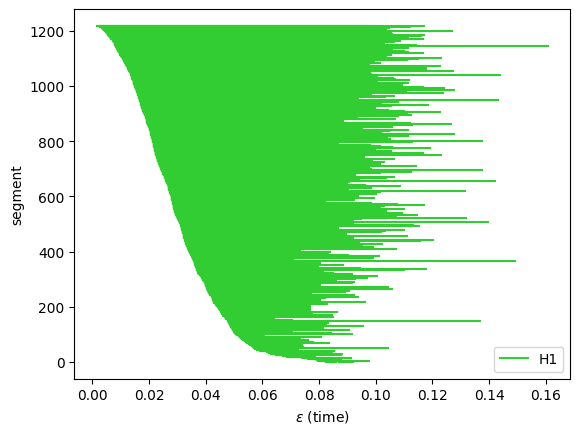

In [1]:
import numpy as np
import rtd

np.random.seed(7)
P = np.random.rand(1000, 2)
Q = np.random.rand(1000, 2)

barc = rtd.calc_embed_dist(P, Q)
rtd.plot_barcodes(rtd.barc2array(barc))

In [2]:
rtd.rtd(P, Q, trials=1)

35.13461368251592

In [28]:
from sklearn.decomposition import PCA

def normalize(arr):
    pca = PCA(n_components=arr.shape[1]).fit(arr)
    arr = pca.transform(arr)
    return (arr - np.mean(arr, axis=0, keepdims=True))/np.std(arr)

In [54]:
import numpy as np
import rtd

np.random.seed(7)
dim = 4096
P = np.random.rand(5000, dim)
Q = PCA(n_components=2).fit(P).transform(P)

# P = normalize(P)
# Q = normalize(Q)

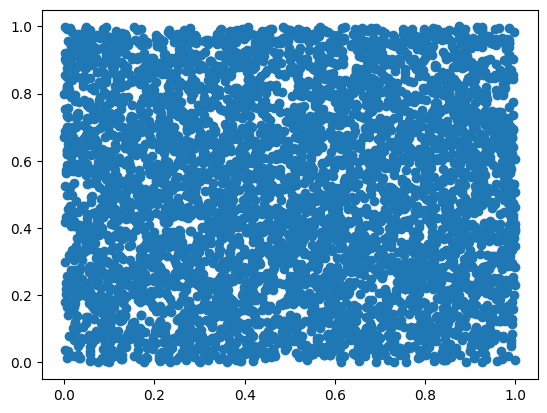

In [55]:
import matplotlib.pyplot as plt
plt.scatter(P[:,0],P[:,1])

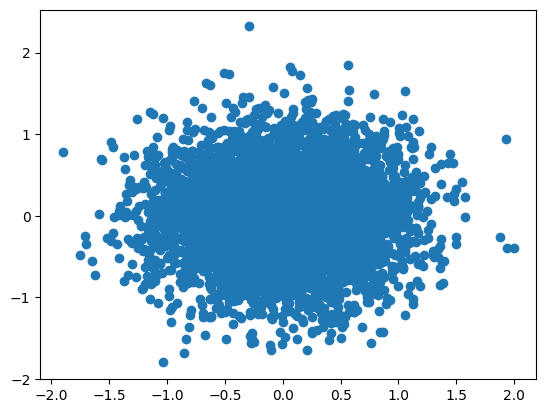

In [56]:
import matplotlib.pyplot as plt
plt.scatter(Q[:,0],Q[:,1])

In [ ]:
rtd.rtd(P, Q, trials=3, batch=200)

In [49]:
Q1 = P[:2500] + 1
Q2 = P[2500:] - 1
Q_j = np.concatenate([Q1, Q2], axis=0)
# Q_j = normalize(Q_j)

In [50]:
Q1 = P[:1000] + 0.5
Q2 = P[1000:2000] - 0.5
Q3 = P[2000:3000] + 1
Q4 = P[3000:4000] - 1
Q5 = P[4000:5000]
Q_new = np.concatenate([Q1, Q2, Q3, Q4, Q5], axis=0)
# Q_new = normalize(Q_new)

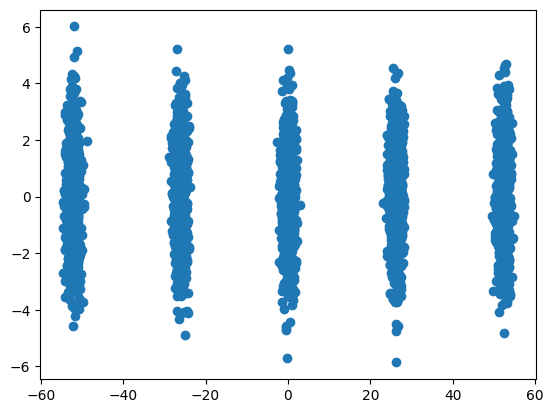

In [40]:
import matplotlib.pyplot as plt
plt.scatter(Q_new[:,0],Q_new[:,1])

In [51]:
rtd.rtd(Q, Q_j, trials=3, batch=200)

15.335196315000454

In [52]:
rtd.rtd(Q, Q_new, trials=3, batch=200)

21.207928467852373

# Noisy Dataset

In [1]:
import rootutils

current_folder = globals()['_dh'][0]

rootutils.setup_root(current_folder, indicator=".project-root", pythonpath=True)

WindowsPath('C:/Users/vlad1/GitHub/TopoHyperDrive')

In [2]:
from src.data.cifar_100_datamodule import CIFAR100Datamodule

dm = CIFAR100Datamodule(num_workers=4)

dm.prepare_data()
dm.setup()

dataloader = dm.test_dataloader()

Files already downloaded and verified
Files already downloaded and verified


In [15]:
import torch

class RandomModel(torch.nn.Module):
    def __init__(
        self,
        in_channels: int,
        out_channels: int,
    ) -> None:
        super().__init__()
        self.layer = torch.nn.Linear(in_channels, out_channels)
        
        for param in self.parameters():
            param.requires_grad = False
            
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        out = self.layer(x)
        return (out - torch.mean(out, dim=0, keepdim=True)) / torch.std(out, dim=0, keepdim=True)
        

In [16]:
noisy = RandomModel(in_channels=32 * 32 * 3, out_channels=2)

In [26]:
outs = []
for batch in dataloader:
    x,y = batch
    out = noisy(x.flatten(1))
    outs.append(out)

In [27]:
out = torch.cat(outs, dim=0)

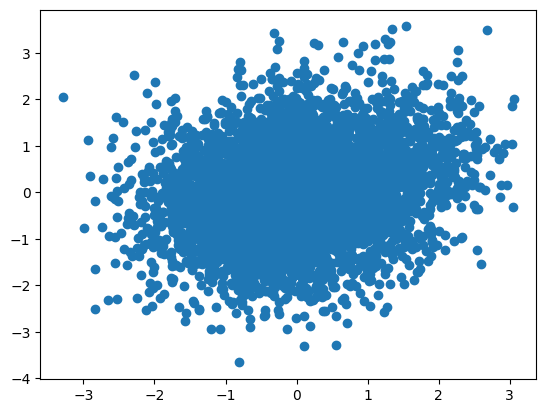

In [28]:
import matplotlib.pyplot as plt
plt.scatter(out[:,0],out[:,1])

In [20]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2).fit(out)

In [32]:
out_transform = out @ torch.Tensor(pca.components_).T

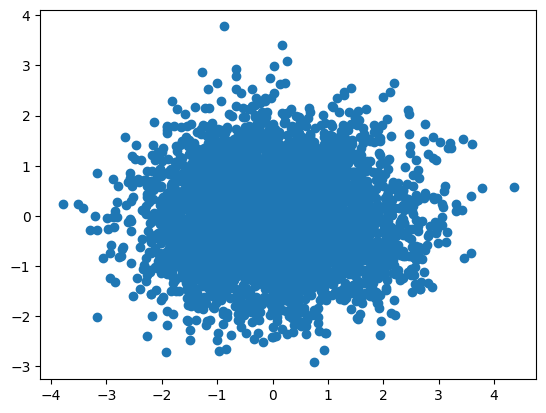

In [33]:
plt.scatter(out_transform[:,0],out_transform[:,1])

In [32]:
import numpy as np
data = np.random.randn(5000,4096)

In [33]:
pca = PCA(n_components=2).fit(data)
dr_data = pca.transform(data)

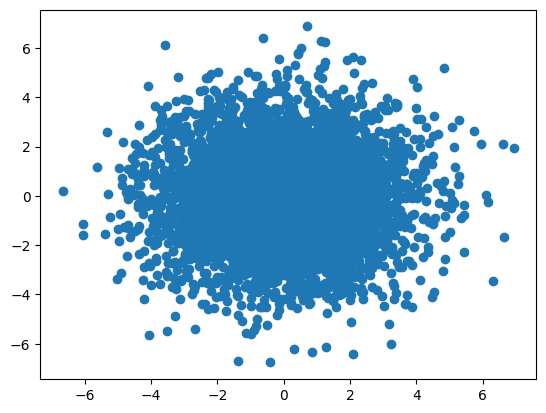

In [35]:
plt.scatter(dr_data[:,0],dr_data[:,1])

In [36]:
32 * 32 * 3

3072